### Obesity prediction using  machine learning models

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv("obesitydataset.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


##  1)CHECK NULL VALUES

In [15]:
df.isnull().sum() 

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [17]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibil

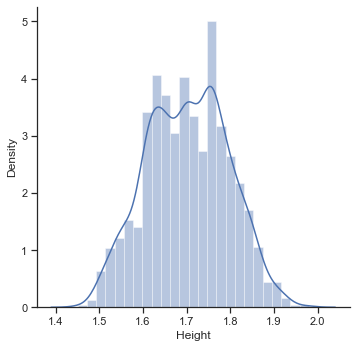

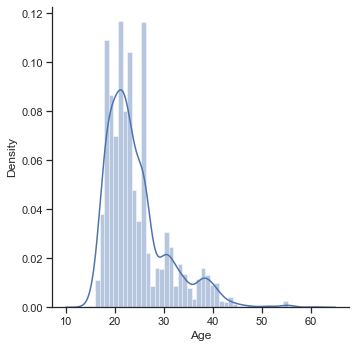

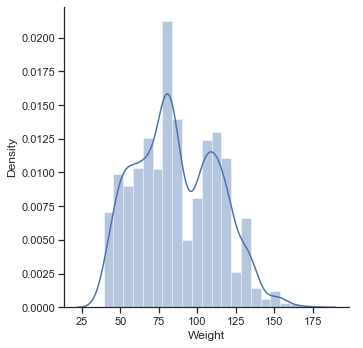

In [54]:
sns.FacetGrid(df,size=5).map(sns.distplot,"Height").add_legend()
sns.FacetGrid(df,size=5).map(sns.distplot,"Age").add_legend()
sns.FacetGrid(df,size=5).map(sns.distplot,"Weight").add_legend()

##  ENCODING CATEGORICAL VARIABLES

In [3]:
import sklearn.preprocessing as preprocessing
le=preprocessing.LabelEncoder()

In [4]:
df['gender']=le.fit_transform(df['Gender'].astype(str))

In [5]:
df['famhistory']=le.fit_transform(df['family_history_with_overweight'].astype(str))
df['favc']=le.fit_transform(df['FAVC'].astype(str))
df['caec']=le.fit_transform(df['CAEC'].astype(str))
df['smoke']=le.fit_transform(df['SMOKE'].astype(str))

In [6]:
df['scc']=le.fit_transform(df['SCC'].astype(str))
df['calc']=le.fit_transform(df['CALC'].astype(str))
df['mtrans']=le.fit_transform(df['MTRANS'].astype(str))
df['nobeyes']=le.fit_transform(df['NObeyesdad'].astype(str))

In [7]:
df=df.drop(['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad'],axis=1)

In [8]:
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,gender,famhistory,favc,caec,smoke,scc,calc,mtrans,nobeyes
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,0,1,0,2,0,0,3,3,1
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,0,1,0,2,1,1,2,3,1
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1,1,0,2,0,0,1,3,1
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,1,0,0,2,0,0,1,4,5
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,1,0,0,2,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0,1,1,2,0,0,2,3,4
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0,1,1,2,0,0,2,3,4
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0,1,1,2,0,0,2,3,4
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0,1,1,2,0,0,2,3,4


In [27]:
df.to_csv('obesitydatasetpreprocessed.csv')

In [9]:
corr=df.corr()

In [10]:
corr.style.background_gradient(cmap='coolwarm')

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,gender,famhistory,favc,caec,smoke,scc,calc,mtrans,nobeyes
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931,0.048394,0.205725,0.063902,0.083739,0.091987,-0.116283,-0.044487,-0.601945,0.236170
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912,0.618466,0.247684,0.178364,0.048818,0.055499,-0.133753,-0.129732,-0.073609,0.038986
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561,0.161668,0.496820,0.272300,0.287493,0.025746,-0.201906,-0.206677,0.004610,0.387643
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135,-0.274505,0.040372,-0.027283,-0.054670,0.014320,0.071852,-0.060781,0.064743,0.018522
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326,0.067600,0.071370,-0.007000,-0.097801,0.007811,-0.015624,-0.071747,-0.053858,-0.092616
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965,0.107930,0.147437,0.009719,0.144995,-0.031995,0.008036,-0.091386,0.044028,0.108868
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562,0.189607,-0.056673,-0.107995,-0.030110,0.011216,0.074221,0.086799,0.006394,-0.129564
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000,0.017269,0.022943,0.068417,-0.048567,0.017613,-0.010928,0.045864,0.176945,-0.069448
gender,0.048394,0.618466,0.161668,-0.274505,0.067600,0.107930,0.189607,0.017269,1.000000,0.102512,0.064934,0.091543,0.044698,-0.102633,0.007616,-0.137537,0.024908
famhistory,0.205725,0.247684,0.496820,0.040372,0.071370,0.147437,-0.056673,0.022943,0.102512,1.000000,0.208036,0.169787,0.017385,-0.185422,0.036676,-0.101540,0.313667


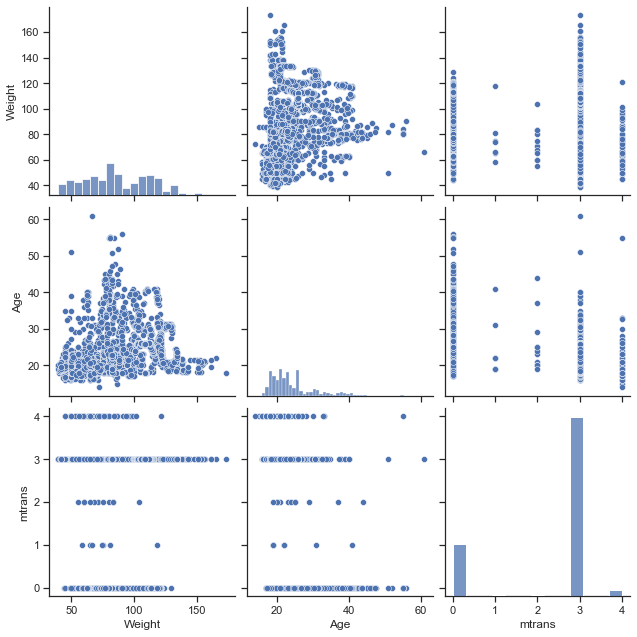

In [49]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=3,vars = ['Weight', 'Age','mtrans'])
plt.show()

In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold, cross_val_score
from matplotlib import pyplot as plt
from sklearn.base import clone



from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier,plot_importance
from sklearn.ensemble import (RandomForestClassifier,
                             AdaBoostClassifier,
                             GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [15]:
y=df.nobeyes
X=df.drop(['nobeyes'],axis='columns')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
X_train.shape, X_test.shape

((1688, 16), (423, 16))

### SUPPORT VECTOR MACHINE

In [17]:
#support vector machine with radial basis function kernel
svc=SVC(C=100.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [18]:
print(accuracy_score(y_test, y_pred))

0.7730496453900709


In [19]:
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.7677131618444506, 0.7730496453900709, 0.7685713590854568, None)

### checking for overfitting and underfitting

In [20]:
svc.score(X_train, y_train)

0.8139810426540285

In [21]:
svc.score(X_test, y_test)

0.7730496453900709

In [22]:
#support vector machine with linear kernel
lsvc=SVC(kernel='linear',C=100.0) 
lsvc.fit(X_train,y_train)
l_pred=lsvc.predict(X_test)

In [23]:
accuracy_score(y_test, l_pred)

0.9692671394799054

In [24]:
precision_recall_fscore_support(y_test, l_pred, average='macro')

(0.9694889352582178, 0.9673624620993042, 0.968146764407293, None)

In [25]:
lsvc.score(X_train, y_train)

0.9774881516587678

In [26]:
lsvc.score(X_test, y_test)

0.9692671394799054

0.977 and 0.96 are comparable values and therefore there has been no overfitting

### hyperparameter tuning using gridsearch

In [30]:
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]
svc1=SVC() 


In [1]:

grid_search = GridSearchCV(estimator = svc1,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

NameError: name 'GridSearchCV' is not defined

In [32]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             scoring='accuracy')

In [36]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.score(X_test, y_test))

0.9537969905009394
{'C': 100, 'kernel': 'linear'}
SVC(C=100, kernel='linear')
0.9692671394799054


### eXtreme Gradient Boosting

In [37]:
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [38]:
xgbc = XGBClassifier(learning_rate=0.5, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [39]:
xgbc.fit(X_train, y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=600, n_jobs=1, nthread=1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              silent=True, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [40]:
xgb_pred = xgbc.predict(X_test)

In [41]:
accuracy_score(y_test, xgb_pred)

0.9763593380614657

In [42]:
precision_recall_fscore_support(y_test, xgb_pred, average='macro')

(0.9765892172936761, 0.975589322957744, 0.9757779053240883, None)

#### Feature Importance

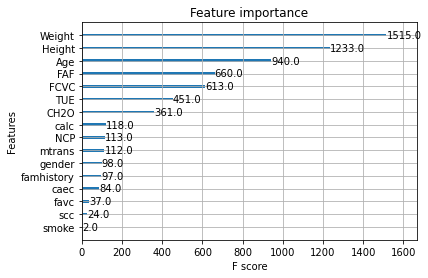

<Figure size 1152x864 with 0 Axes>

In [43]:
xgb.plot_importance(xgbc)
plt.figure(figsize = (16, 12))
plt.show()

In [44]:
list(xgbc.get_booster().get_fscore().items())

[('Age', 940.0),
 ('Height', 1233.0),
 ('Weight', 1515.0),
 ('FCVC', 613.0),
 ('NCP', 113.0),
 ('CH2O', 361.0),
 ('FAF', 660.0),
 ('TUE', 451.0),
 ('gender', 98.0),
 ('famhistory', 97.0),
 ('favc', 37.0),
 ('caec', 84.0),
 ('smoke', 2.0),
 ('scc', 24.0),
 ('calc', 118.0),
 ('mtrans', 112.0)]

### ADAboost with different base estimators 

Base estimator= decision tree

In [45]:
ada=AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=0.1,n_estimators=200,algorithm= 'SAMME')

In [46]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   learning_rate=0.1, n_estimators=200)

In [47]:
pre=ada.predict(X_test)

In [48]:
accuracy_score(y_test, pre)

0.9243498817966903

In [49]:
precision_recall_fscore_support(y_test, pre, average='macro')

(0.9249050660469891, 0.9224361147259071, 0.9227558966747847, None)

base estimator= extra trees classifier

In [50]:
ada1=AdaBoostClassifier(ExtraTreesClassifier(),learning_rate=0.5,n_estimators=200,algorithm= 'SAMME.R')

In [51]:
ada1.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=ExtraTreesClassifier(), learning_rate=0.5,
                   n_estimators=200)

In [52]:
pre1=ada1.predict(X_test)

In [53]:
accuracy_score(y_test, pre1)

0.933806146572104

In [54]:
precision_recall_fscore_support(y_test, pre1, average='macro')

(0.9381833852422089, 0.9321595921753031, 0.932814352562044, None)

base estimator= support vector machine

In [55]:
ada2=AdaBoostClassifier(SVC(kernel='linear',C=100.0),learning_rate=0.4,n_estimators=100,algorithm= 'SAMME')
ada2.fit(X_train,y_train)
pre2=ada2.predict(X_test)
accuracy_score(y_test, pre2)

0.8226950354609929

In [56]:
precision_recall_fscore_support(y_test, pre2, average='macro')

(0.8255784067082088, 0.8209615992805309, 0.8212744451019959, None)

base estimator= random forest

In [57]:
ada3=AdaBoostClassifier(RandomForestClassifier(),learning_rate=0.1,n_estimators=200,algorithm= 'SAMME.R')

In [58]:
ada3.fit(X_train,y_train)
pre3=ada3.predict(X_test)
accuracy_score(y_test, pre3)

0.9527186761229315

In [59]:
precision_recall_fscore_support(y_test, pre3, average='macro')

(0.9553444566232291, 0.9512373736921307, 0.9514757258662894, None)

### Hyperparameter tuning with adaboost

In [62]:
bdt_ada = GridSearchCV(ada,{'learning_rate':[0.1,0.4,0.5,0.8],
                            'n_estimators':[50,60,80,100,200,300,400],
                            'algorithm': ['SAMME', 'SAMME.R']})

In [63]:
bdt_ada.fit(X_train,y_train)
print(bdt_ada.best_score_)
print(bdt_ada.best_params_)

0.9242076800168559
{'algorithm': 'SAMME.R', 'learning_rate': 0.8, 'n_estimators': 100}


### Gradient boosting 

In [64]:
gb= GradientBoostingClassifier(n_estimators=200, learning_rate = 0.3, max_features=2, max_depth = 2, random_state = 0)

In [65]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, max_depth=2, max_features=2,
                           n_estimators=200, random_state=0)

In [66]:
gb_pre=gb.predict(X_test)

In [67]:
accuracy_score(y_test, gb_pre)

0.9598108747044918

In [68]:
precision_recall_fscore_support(y_test, gb_pre, average='macro')

(0.9588114956127379, 0.9583283958774924, 0.9583539706996208, None)

In [69]:
from sklearn import metrics

In [70]:
print(metrics.classification_report(y_test, gb_pre, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.954     0.976        65
           1      0.900     0.947     0.923        57
           2      0.957     0.985     0.971        67
           3      1.000     1.000     1.000        53
           4      1.000     1.000     1.000        69
           5      0.911     0.895     0.903        57
           6      0.944     0.927     0.936        55

    accuracy                          0.960       423
   macro avg      0.959     0.958     0.958       423
weighted avg      0.960     0.960     0.960       423



### Random forest

In [71]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rf_pred=rfc.predict(X_test)
accuracy_score(y_test,rf_pred)

0.9527186761229315

In [72]:
precision_recall_fscore_support(y_test, rf_pred, average='macro')

(0.9593326986761973, 0.9513353888844855, 0.9520514626104063, None)

In [74]:
print(metrics.classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        65
           1       0.77      1.00      0.87        57
           2       0.99      0.99      0.99        67
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        69
           5       0.98      0.84      0.91        57
           6       0.98      0.91      0.94        55

    accuracy                           0.95       423
   macro avg       0.96      0.95      0.95       423
weighted avg       0.96      0.95      0.95       423



### Category Boosting (CatBoost).

In [75]:
clf = CatBoostClassifier(
    iterations=1000,
  learning_rate=0.4,
  depth=5,
  colsample_bylevel=0.8,
  random_seed = 2020,
  bagging_temperature = 0.2,
  metric_period = None,
  custom_loss=['AUC', 'Accuracy']
)

In [76]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [77]:
clf.fit(X_train, y_train)

0:	learn: 1.3808692	total: 157ms	remaining: 2m 37s
1:	learn: 1.0797037	total: 174ms	remaining: 1m 27s
2:	learn: 0.8543911	total: 187ms	remaining: 1m 2s
3:	learn: 0.7422935	total: 198ms	remaining: 49.3s
4:	learn: 0.6586774	total: 212ms	remaining: 42.3s
5:	learn: 0.5961040	total: 226ms	remaining: 37.4s
6:	learn: 0.5316042	total: 239ms	remaining: 33.9s
7:	learn: 0.4894393	total: 252ms	remaining: 31.3s
8:	learn: 0.4495417	total: 265ms	remaining: 29.2s
9:	learn: 0.4359268	total: 279ms	remaining: 27.7s
10:	learn: 0.3988574	total: 292ms	remaining: 26.2s
11:	learn: 0.3700589	total: 303ms	remaining: 24.9s
12:	learn: 0.3486471	total: 313ms	remaining: 23.8s
13:	learn: 0.3258914	total: 326ms	remaining: 22.9s
14:	learn: 0.3078422	total: 337ms	remaining: 22.1s
15:	learn: 0.2984022	total: 348ms	remaining: 21.4s
16:	learn: 0.2853406	total: 359ms	remaining: 20.8s
17:	learn: 0.2680428	total: 372ms	remaining: 20.3s
18:	learn: 0.2582855	total: 385ms	remaining: 19.9s
19:	learn: 0.2401771	total: 396ms	remai

173:	learn: 0.0184581	total: 2.29s	remaining: 10.9s
174:	learn: 0.0182489	total: 2.3s	remaining: 10.9s
175:	learn: 0.0180681	total: 2.32s	remaining: 10.8s
176:	learn: 0.0179844	total: 2.35s	remaining: 10.9s
177:	learn: 0.0178042	total: 2.36s	remaining: 10.9s
178:	learn: 0.0176769	total: 2.38s	remaining: 10.9s
179:	learn: 0.0174500	total: 2.39s	remaining: 10.9s
180:	learn: 0.0173160	total: 2.4s	remaining: 10.9s
181:	learn: 0.0170323	total: 2.41s	remaining: 10.8s
182:	learn: 0.0169745	total: 2.43s	remaining: 10.9s
183:	learn: 0.0167999	total: 2.44s	remaining: 10.8s
184:	learn: 0.0165695	total: 2.46s	remaining: 10.8s
185:	learn: 0.0164798	total: 2.47s	remaining: 10.8s
186:	learn: 0.0163833	total: 2.48s	remaining: 10.8s
187:	learn: 0.0162360	total: 2.5s	remaining: 10.8s
188:	learn: 0.0160806	total: 2.51s	remaining: 10.8s
189:	learn: 0.0160357	total: 2.52s	remaining: 10.8s
190:	learn: 0.0159735	total: 2.53s	remaining: 10.7s
191:	learn: 0.0158710	total: 2.54s	remaining: 10.7s
192:	learn: 0.0

335:	learn: 0.0079763	total: 4.43s	remaining: 8.76s
336:	learn: 0.0079744	total: 4.45s	remaining: 8.75s
337:	learn: 0.0079527	total: 4.47s	remaining: 8.76s
338:	learn: 0.0079248	total: 4.48s	remaining: 8.74s
339:	learn: 0.0079229	total: 4.49s	remaining: 8.72s
340:	learn: 0.0079104	total: 4.52s	remaining: 8.73s
341:	learn: 0.0078997	total: 4.53s	remaining: 8.72s
342:	learn: 0.0078667	total: 4.54s	remaining: 8.7s
343:	learn: 0.0078543	total: 4.55s	remaining: 8.68s
344:	learn: 0.0078322	total: 4.57s	remaining: 8.67s
345:	learn: 0.0078026	total: 4.58s	remaining: 8.65s
346:	learn: 0.0077552	total: 4.59s	remaining: 8.63s
347:	learn: 0.0077179	total: 4.61s	remaining: 8.64s
348:	learn: 0.0077014	total: 4.62s	remaining: 8.62s
349:	learn: 0.0076933	total: 4.63s	remaining: 8.61s
350:	learn: 0.0076541	total: 4.65s	remaining: 8.59s
351:	learn: 0.0076150	total: 4.66s	remaining: 8.58s
352:	learn: 0.0075804	total: 4.67s	remaining: 8.56s
353:	learn: 0.0075724	total: 4.7s	remaining: 8.58s
354:	learn: 0.

506:	learn: 0.0050450	total: 6.84s	remaining: 6.66s
507:	learn: 0.0050248	total: 6.86s	remaining: 6.64s
508:	learn: 0.0050054	total: 6.87s	remaining: 6.62s
509:	learn: 0.0049983	total: 6.88s	remaining: 6.61s
510:	learn: 0.0049892	total: 6.89s	remaining: 6.59s
511:	learn: 0.0049851	total: 6.9s	remaining: 6.58s
512:	learn: 0.0049704	total: 6.91s	remaining: 6.56s
513:	learn: 0.0049511	total: 6.93s	remaining: 6.55s
514:	learn: 0.0049477	total: 6.94s	remaining: 6.54s
515:	learn: 0.0049440	total: 6.95s	remaining: 6.52s
516:	learn: 0.0049218	total: 6.96s	remaining: 6.5s
517:	learn: 0.0049106	total: 6.97s	remaining: 6.49s
518:	learn: 0.0048955	total: 6.99s	remaining: 6.47s
519:	learn: 0.0048887	total: 7s	remaining: 6.46s
520:	learn: 0.0048751	total: 7.01s	remaining: 6.44s
521:	learn: 0.0048623	total: 7.02s	remaining: 6.43s
522:	learn: 0.0048578	total: 7.04s	remaining: 6.42s
523:	learn: 0.0048382	total: 7.05s	remaining: 6.41s
524:	learn: 0.0048260	total: 7.06s	remaining: 6.39s
525:	learn: 0.004

670:	learn: 0.0036895	total: 9.02s	remaining: 4.42s
671:	learn: 0.0036839	total: 9.04s	remaining: 4.41s
672:	learn: 0.0036663	total: 9.05s	remaining: 4.4s
673:	learn: 0.0036604	total: 9.07s	remaining: 4.38s
674:	learn: 0.0036459	total: 9.08s	remaining: 4.37s
675:	learn: 0.0036428	total: 9.09s	remaining: 4.36s
676:	learn: 0.0036302	total: 9.1s	remaining: 4.34s
677:	learn: 0.0036262	total: 9.11s	remaining: 4.33s
678:	learn: 0.0036232	total: 9.13s	remaining: 4.31s
679:	learn: 0.0036117	total: 9.14s	remaining: 4.3s
680:	learn: 0.0036040	total: 9.15s	remaining: 4.29s
681:	learn: 0.0035963	total: 9.16s	remaining: 4.27s
682:	learn: 0.0035933	total: 9.17s	remaining: 4.26s
683:	learn: 0.0035913	total: 9.19s	remaining: 4.24s
684:	learn: 0.0035857	total: 9.2s	remaining: 4.23s
685:	learn: 0.0035657	total: 9.21s	remaining: 4.22s
686:	learn: 0.0035592	total: 9.22s	remaining: 4.2s
687:	learn: 0.0035567	total: 9.23s	remaining: 4.19s
688:	learn: 0.0035373	total: 9.25s	remaining: 4.17s
689:	learn: 0.003

830:	learn: 0.0028415	total: 11.1s	remaining: 2.27s
831:	learn: 0.0028347	total: 11.2s	remaining: 2.25s
832:	learn: 0.0028317	total: 11.2s	remaining: 2.24s
833:	learn: 0.0028278	total: 11.2s	remaining: 2.23s
834:	learn: 0.0028228	total: 11.2s	remaining: 2.21s
835:	learn: 0.0028215	total: 11.2s	remaining: 2.2s
836:	learn: 0.0028068	total: 11.2s	remaining: 2.18s
837:	learn: 0.0028030	total: 11.2s	remaining: 2.17s
838:	learn: 0.0027991	total: 11.2s	remaining: 2.16s
839:	learn: 0.0027966	total: 11.3s	remaining: 2.14s
840:	learn: 0.0027913	total: 11.3s	remaining: 2.13s
841:	learn: 0.0027873	total: 11.3s	remaining: 2.12s
842:	learn: 0.0027862	total: 11.3s	remaining: 2.1s
843:	learn: 0.0027829	total: 11.3s	remaining: 2.09s
844:	learn: 0.0027817	total: 11.3s	remaining: 2.08s
845:	learn: 0.0027806	total: 11.3s	remaining: 2.06s
846:	learn: 0.0027763	total: 11.3s	remaining: 2.05s
847:	learn: 0.0027725	total: 11.4s	remaining: 2.04s
848:	learn: 0.0027672	total: 11.4s	remaining: 2.02s
849:	learn: 0.

995:	learn: 0.0022978	total: 13.3s	remaining: 53.5ms
996:	learn: 0.0022947	total: 13.3s	remaining: 40.2ms
997:	learn: 0.0022938	total: 13.4s	remaining: 26.8ms
998:	learn: 0.0022926	total: 13.4s	remaining: 13.4ms
999:	learn: 0.0022897	total: 13.4s	remaining: 0us


In [79]:
clf.is_fitted()

True

In [80]:
clf.get_params()

{'iterations': 1000,
 'learning_rate': 0.4,
 'depth': 5,
 'random_seed': 2020,
 'custom_loss': ['AUC', 'Accuracy'],
 'bagging_temperature': 0.2,
 'colsample_bylevel': 0.8}

In [81]:
p=clf.predict(X_test)

In [82]:
accuracy_score(y_test, p)

0.9787234042553191

In [83]:
precision_recall_fscore_support(y_test, p, average='weighted')

(0.9792741367626641, 0.9787234042553191, 0.9788266637705172, None)

### Light Gradient Boosting Method (LightGBM)

In [85]:
lgm= LGBMClassifier(objective='regression',num_leaves=31,
                              learning_rate=0.6, n_estimators=500,
                              max_bin = 100, bagging_fraction = 0.4)

In [87]:
lgm.fit(X_train, y_train)

[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4


LGBMClassifier(bagging_fraction=0.4, learning_rate=0.6, max_bin=100,
               n_estimators=500, objective='regression')

In [88]:
n=lgm.predict(X_test)
accuracy_score(y_test, n)

0.9905437352245863

In [89]:
precision_recall_fscore_support(y_test, n, average='macro')

(0.9904685037856951, 0.990900327742433, 0.9906096059113301, None)

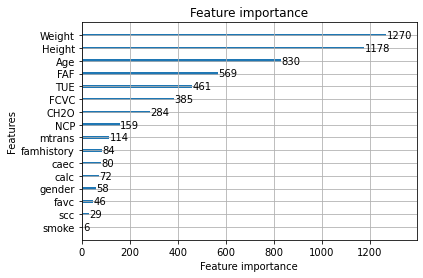

In [90]:
ax = lgb.plot_importance(lgm, max_num_features=20)
plt.show()

### Neural Network

In [91]:
X_train

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,gender,famhistory,favc,caec,smoke,scc,calc,mtrans
1295,38.148845,1.557808,79.661693,2.000000,3.000000,1.274774,0.000000,0.000000,0,1,1,2,0,0,2,0
1627,40.366238,1.722396,109.349025,2.281963,3.770379,1.000000,1.330519,0.000000,1,1,1,2,0,0,3,0
1388,39.648946,1.572791,80.086524,2.071622,2.977909,1.468297,0.000000,0.000000,0,1,1,2,0,0,3,0
1318,23.237302,1.761008,97.829344,2.000000,3.000000,2.988771,2.429923,1.978043,1,1,1,2,0,0,3,3
648,22.547298,1.722461,51.881263,2.663421,3.000000,1.041110,0.794402,1.391948,0,1,1,1,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,19.671876,1.699474,78.000000,1.925064,2.358298,2.774043,0.000000,0.133566,1,1,0,2,0,0,3,3
1731,30.554956,1.779136,120.600940,2.671238,3.000000,2.145368,0.882709,0.593917,1,1,1,2,0,0,2,0
763,21.000000,1.620000,70.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1,0,1,3,0,0,2,3
835,29.320380,1.642506,69.906708,2.366949,3.000000,1.926577,1.581242,0.000000,0,1,1,2,0,0,2,0


In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from tensorflow import keras

In [93]:
#Initialising ANN

model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(16,), activation='relu'),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(3, activation="softmax", kernel_initializer="normal")
])

In [94]:
model.compile(optimizer="adam",loss="mean_squared_error",metrics=['accuracy'])

In [95]:
model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
53/53 [==============================] - 1s 2ms/step - loss: 11.0773 - accuracy: 0.1546
Epoch 2/100
53/53 [==============================] - 0s 2ms/step - loss: 11.0770 - accuracy: 0.1688
Epoch 3/100
53/53 [==============================] - 0s 2ms/step - loss: 11.0769 - accuracy: 0.1493
Epoch 4/100
53/53 [==============================] - 0s 2ms/step - loss: 11.0769 - accuracy: 0.1511
Epoch 5/100
53/53 [==============================] - 0s 2ms/step - loss: 11.0770 - accuracy: 0.1517
Epoch 6/100
53/53 [==============================] - 0s 2ms/step - loss: 11.0770 - accuracy: 0.1487
Epoch 7/100
53/53 [==============================] - 0s 2ms/step - loss: 11.0769 - accuracy: 0.1505
Epoch 8/100
53/53 [==============================] - 0s 2ms/step - loss: 11.0769 - accuracy: 0.1511
Epoch 9/100
53/53 [==============================] - 0s 2ms/step - loss: 11.0769 - accuracy: 0.1493
Epoch 10/100
53/53 [==============================] - 0s 2ms/step - loss: 11.0769 - accuracy: 0.1499

In [96]:
model.evaluate(X_train,y_train)

53/53 [==============================] - 0s 2ms/step - loss: 11.0769 - accuracy: 0.1410


[11.076948165893555, 0.14099526405334473]

In [97]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4352      
                                                                 
 dense_1 (Dense)             (None, 32)                8224      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 12,675
Trainable params: 12,675
Non-trainable params: 0
_________________________________________________________________


In [98]:
len(model.weights)

6